In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

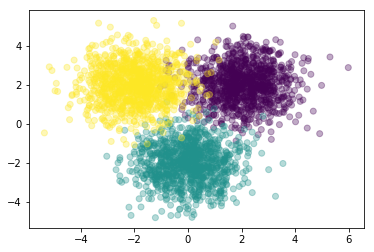

In [11]:
D = 2 # Number of predictors
K = 3 #Number of targets
N = int(K*1e3)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure()
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.3333)

In [12]:
X.shape

(3000, 2)

In [13]:
y.shape

(3000,)

In [14]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def shuffle(*args):
    idx = np.random.permutation(len(args[0]))
    return [X[idx] for X in args]

def ReLU(H):
    return H*(H > 0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def feed_forward(X,W1,b1,W2,b2):
    Z1 = ReLU(np.matmul(X,W1) + b1)
    P_hat = softmax(np.matmul(Z1,W2) + b2)
    return Z1, P_hat
    
def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [15]:
Y = one_hot_encode(y)
Y.shape

(3000, 3)

In [6]:
M = 6 #Number of nuerons in a layer

W1_0 = np.random.randn(D,M)
b1_0 = np.random.randn(M)
W2_0 = np.random.randn(M,K)
b2_0 = np.random.randn(K)

In [7]:
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

eta = 1e-4
epochs = int(1e2)
J = np.zeros(epochs)

for epoch in range(epochs):
    Z1, P_hat = feed_forward(X,W1,b1,W2,b2)
    J[epoch] = cross_entropy(Y,P_hat)
    
    dH2 = P_hat - Y
    dW2 = np.matmul(Z1.T,dH2)
    W2 -= eta*dW2
    b2 -= eta*dH2.sum(axis = 0)
    
    dZ1 = np.matmul(dH2,W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T,dH1)
    W1 -= eta*dW1
    b1 -= eta*dH1.sum(axis = 0)

In [71]:
#RMS Prop with Nesterov momentum




W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

GW1 = 1
Gb1 = 1
GW2 = 1
Gb2 = 1

#v is velocity in Nesterov
vW1 = 0
vb1 = 0
vW2 = 0
vb2 = 0

gamma = .999
epsilon = 1e-8

eta = 1e-4
mu = 0.9

J_RMS = np.zeros(epochs)

for epoch in range(1,epochs):
    #Second layer
    Z1, P_hat = feed_forward(X,W1,b1,W2,b2)
    J_RMS[epoch] = cross_entropy(Y,P_hat)
    dH2 = P_hat - Y
    dW2 = np.matmul(Z1.T,dH2)
    db2 = dH2.sum(axis=0)
    
    vW2 = mu*vW2 - eta*dW2
    vb2 = mu*vb2 - eta*db2
    
    GW2 = gamma * GW2 + (1+gamma) * dW2**2
    Gb2 = gamma * Gb2 + (1+gamma) * db2**2
    
    
    W2 += mu * vW2 - eta / (np.sqrt(GW2 + epsilon)) * dW2
    b2 += mu * vb2 - eta / (np.sqrt(Gb2 + epsilon)) * db2
    
    #First Layer
    dZ1 = np.matmul(dH2,W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T,dH1)
    db1 = dH1.sum(axis = 0)
    
    vW1 = mu*vW1 - eta*dW1
    vb1 = mu*vb1 - eta*db1
    
    GW1 = gamma * GW1 + (1+gamma) * dW1**2
    Gb1 = gamma * Gb1 + (1+gamma) * db1**2
    
    W1 += mu * vW1 - eta / (np.sqrt(GW1 + epsilon)) * dW1
    b1 += mu * vb1 - eta / (np.sqrt(Gb1 + epsilon)) * db1

In [65]:
J_RMS

array([   0.        , 3774.59951942, 3755.84056496, 3720.56890575,
       3671.05317507, 3609.54131   , 3538.2588333 , 3459.28635204,
       3374.57209669, 3285.87948689, 3194.81022775, 3102.73954174,
       3010.8384345 , 2920.13368275, 2831.52357264, 2745.70787383,
       2663.14466944, 2584.23618618, 2509.27930334, 2438.46717904,
       2371.83320784, 2309.77561035, 2252.46673917, 2200.13496679,
       2152.94002175, 2110.83181757, 2073.8528427 , 2041.29202868,
       2012.95160173, 1988.328531  , 1966.40684717, 1946.35934339,
       1927.57345473, 1909.69512963, 1892.49320275, 1875.88074279,
       1859.79073476, 1844.19465916, 1829.07290722, 1814.4046621 ,
       1800.16084374, 1786.31513847, 1772.85543731, 1759.76241035,
       1747.03348855, 1734.63513754, 1722.54902589, 1710.76311324,
       1699.25349332, 1688.01512104, 1677.02062933, 1666.25472815,
       1655.70864105, 1645.37632424, 1635.23935464, 1625.30531458,
       1615.54642765, 1605.97337613, 1596.57597405, 1587.34600

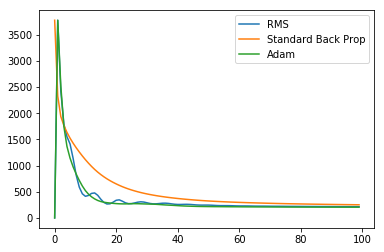

In [72]:
# Adam 

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J_m_a = np.zeros(epochs)


gamma = .999
epsilon = 1e-8

eta = 1e-1
mu = 0.9

#v is variance in Adam

vW1 = 0
vb1 = 0
vW2 = 0
vb2 = 0
m1_v = 0
m2_v = 0
v1_v = 0
v2_v = 0

m1_b = 0
m2_b = 0
v1_b = 0
v2_b = 0



for epoch in range(1,epochs):
    #Second layer
    Z1, P_hat = feed_forward(X,W1,b1,W2,b2)
    J_m_a[epoch] = cross_entropy(Y,P_hat)
    dH2 = P_hat - Y
    dW2 = np.matmul(Z1.T,dH2)
    db2 = dH2.sum(axis = 0)
    
    #Variance
    m2_v = mu * m2_v + (1 - mu) * dW2
    v2_v = gamma * v2_v + (1 - gamma) * dW2**2
    m_hat2_v = m2_v / (1 - mu**epoch)
    v_hat2_v = v2_v / (1 - gamma**epoch)
    #For bias
    m2_b = mu * m2_b + (1 - mu) * db2
    v2_b = gamma * v2_b + (1 - gamma) * db2**2
    m_hat2_b = m2_b / (1 - mu**epoch)
    v_hat2_b = v2_b /(1 - gamma**epoch)
    
    W2 -= eta / np.sqrt(v_hat2_v + epsilon) * m_hat2_v
    b2 -= eta / np.sqrt(v_hat2_b + epsilon) * m_hat2_b
    
    
    #First layer
    dZ1 = np.matmul(dH2,W2.T)
    dH1 = dZ1*(Z1 > 0)
    dW1 = np.matmul(X.T,dH1)
    db1 = dH1.sum(axis = 0)
    #For variance
    m1_v = mu * m1_v + (1 - mu) * dW1
    v1_v = gamma * v1_v + (1 - gamma) * dW1**2
    m_hat1_v = m1_v / (1 - mu**epoch)
    v_hat1_v = v1_v /(1 - gamma**epoch)
    
    #For bias
    m1_b = mu * m1_b + (1 - mu) * db1
    v1_b = gamma * v1_b + (1 - gamma) * db1**2
    m_hat1_b = m1_b / (1 - mu**epoch)
    v_hat1_b = v1_b /(1 - gamma**epoch)
    
    W1 -= eta / np.sqrt(v_hat1_v + epsilon) * m_hat1_v
    b1 -= eta / np.sqrt(v_hat1_b + epsilon) * m_hat1_b
    
        
plt.figure()
plt.plot(J_RMS,label = "RMS")
plt.plot(J, label = "Standard Back Prop")
plt.plot(J_m_a, label = "Adam")
plt.legend()